In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

from datetime import date
import sweetviz as sw
import warnings
warnings.filterwarnings('ignore')

# Analises

In [7]:
data = pd.read_csv("./data/psel - data.csv")

In [8]:
data_backup = data.copy()

In [9]:
data.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349184,0,4693,0,46739
1,2019-01-02,867328,0,8501,0,83129
2,2019-01-03,758590,0,9375,0,86067
3,2019-01-04,688873,0,8405,0,69363
4,2019-01-05,441760,0,6136,0,56183


In [10]:
data.tail()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
634,2020-09-26,2509687,1580,15320,9292,96178
635,2020-09-27,2182679,1838,14135,10052,103494
636,2020-09-28,3496475,2684,21724,11224,127524
637,2020-09-29,4519732,3037,28017,11570,150116
638,2020-09-30,6240174,3848,38535,9685,150780


In [11]:
data.describe()

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
count,6.390000e+02,639.000000,639.000000,639.000000,639.000000
mean,1.623891e+06,528.350548,19039.140845,1439.848200,101610.485133
std,1.160581e+06,1201.781347,13677.729723,3369.872063,37240.234152
min,3.208500e+04,0.000000,3557.000000,0.000000,26298.000000
25%,8.073420e+05,0.000000,11013.000000,0.000000,77727.000000
50%,1.263161e+06,0.000000,16069.000000,0.000000,96104.000000
75%,2.232770e+06,0.000000,22606.500000,0.000000,117586.500000
max,1.226684e+07,5586.000000,188955.000000,13059.000000,369989.000000


In [12]:
data.data = pd.to_datetime(data.data)

In [13]:
data.min()

data               2019-01-01 00:00:00
receita                          32085
transacoes_blog                      0
transacoes_site                   3557
usuarios_blog                        0
usuarios_site                    26298
dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             639 non-null    datetime64[ns]
 1   receita          639 non-null    int64         
 2   transacoes_blog  639 non-null    int64         
 3   transacoes_site  639 non-null    int64         
 4   usuarios_blog    639 non-null    int64         
 5   usuarios_site    639 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 30.1 KB


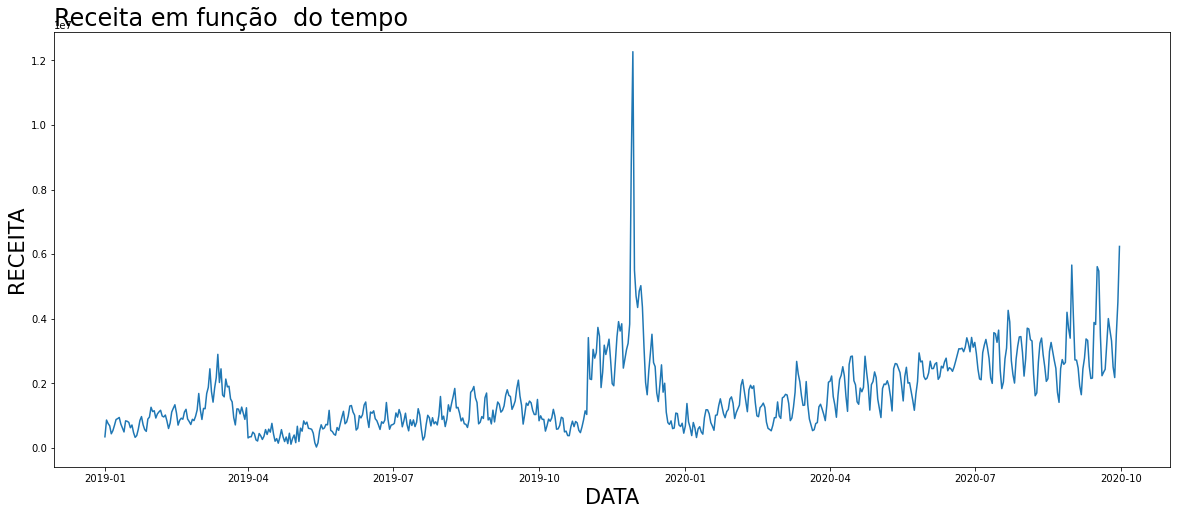

In [15]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='receita', data=data)
fig.set_title("Receita em função  do tempo", loc='left',fontsize=24)
fig.set_xlabel("DATA",fontsize=21)
fig.set_ylabel("RECEITA",fontsize=21);

In [18]:
report =sw.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

In [19]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Definindo funções

### funções para plot

In [13]:
def plot_line(x,y,titulo,xlabel,ylabel,data,hue=None):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=data)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left',fontsize=20)
    ax.set_xlabel(xlabel,fontsize=18)
    ax.set_ylabel(ylabel,fontsize=18, rotation=90);

In [14]:
def plot_bar(x,y,titulo,xlabel,ylabel,data):
    plt.figure(figsize=(21,10))
    ax = plt.bar(data[x],data[y])
    plt.title(titulo, loc='left',fontsize=20)
    plt.xlabel(xlabel ,fontsize=18)
    plt.ylabel(ylabel,fontsize=24,rotation=90)

In [15]:
data['receita_aceleracao'] = data['receita'].diff()

In [16]:
data['transacoes_blog_aceleracao'] = data['transacoes_blog'].diff()
data['transacoes_site_aceleracao'] = data['transacoes_site'].diff()
data['usuarios_blog_aceleracao'] = data['usuarios_blog'].diff()
data['usuarios_site_aceleracao'] = data['usuarios_site'].diff()

In [17]:
data.head(15)

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,receita_aceleracao,transacoes_blog_aceleracao,transacoes_site_aceleracao,usuarios_blog_aceleracao,usuarios_site_aceleracao
0,2019-01-01,349184,0,4693,0,46739,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,867328,0,8501,0,83129,518144.0,0.0,3808.0,0.0,36390.0
2,2019-01-03,758590,0,9375,0,86067,-108738.0,0.0,874.0,0.0,2938.0
3,2019-01-04,688873,0,8405,0,69363,-69717.0,0.0,-970.0,0.0,-16704.0
4,2019-01-05,441760,0,6136,0,56183,-247113.0,0.0,-2269.0,0.0,-13180.0
5,2019-01-06,539398,0,5762,0,50790,97638.0,0.0,-374.0,0.0,-5393.0
6,2019-01-07,703413,0,8072,0,73742,164015.0,0.0,2310.0,0.0,22952.0
7,2019-01-08,884104,0,9455,0,84951,180691.0,0.0,1383.0,0.0,11209.0
8,2019-01-09,911559,0,10152,0,80605,27455.0,0.0,697.0,0.0,-4346.0
9,2019-01-10,946827,0,11294,0,87958,35268.0,0.0,1142.0,0.0,7353.0


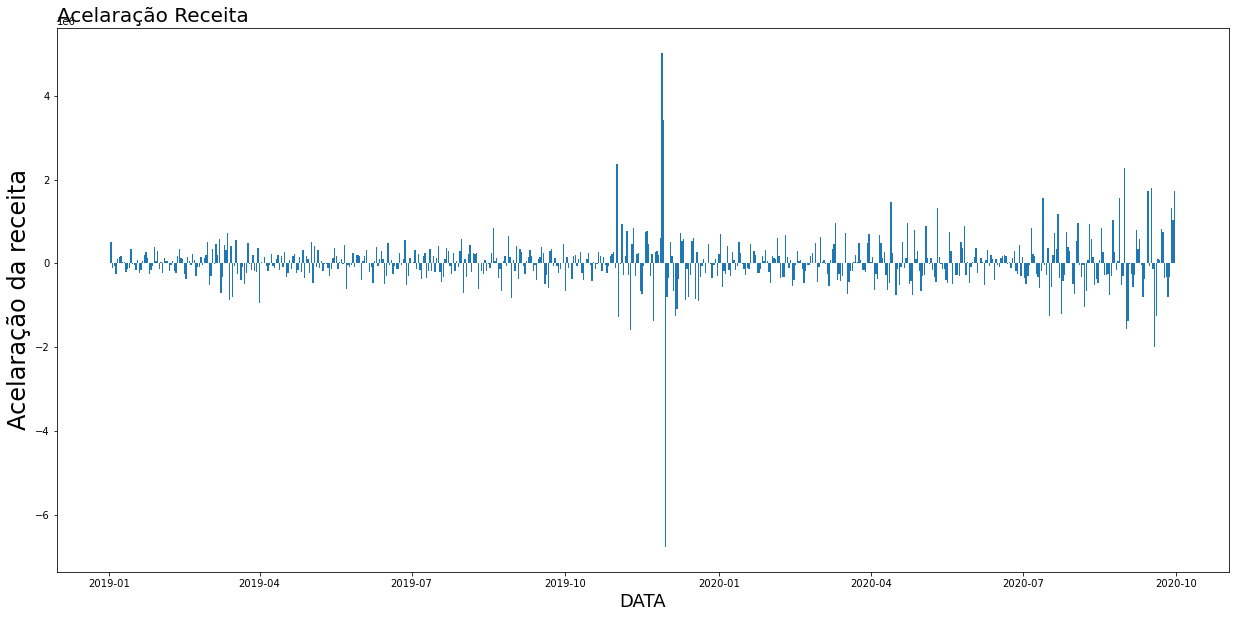

In [18]:
plot_bar(titulo='Acelaração Receita',x='data',y='receita_aceleracao',xlabel='DATA',ylabel='Acelaração da receita',data=data)

In [19]:
data['media_receita'] = data.receita.rolling(window=7, center=False).mean()
data['media_receita_14']=data.receita.rolling(window=14, center=False).mean()

data['media_transacoes_site'] = data.transacoes_site.rolling(window=7, center=False).mean()
data['media_transacoes_site_14']=data.transacoes_site.rolling(window=14, center=False).mean()

data['media_transacoes_blog'] = data.transacoes_blog.rolling(window=7, center=False).mean()
data['media_transacoes_blog_14']=data.transacoes_blog.rolling(window=14, center=False).mean()

data['media_usuarios_blog'] = data.usuarios_blog.rolling(window=7, center=False).mean()
data['media_usuarios_blog_14']=data.usuarios_blog.rolling(window=14, center=False).mean()

data['media_usuarios_site'] = data.usuarios_site.rolling(window=7, center=False).mean()
data['media_usuarios_site_14']=data.usuarios_site.rolling(window=14, center=False).mean()
data.head(15)

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,receita_aceleracao,transacoes_blog_aceleracao,transacoes_site_aceleracao,usuarios_blog_aceleracao,...,media_receita,media_receita_14,media_transacoes_site,media_transacoes_site_14,media_transacoes_blog,media_transacoes_blog_14,media_usuarios_blog,media_usuarios_blog_14,media_usuarios_site,media_usuarios_site_14
0,2019-01-01,349184,0,4693,0,46739,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,867328,0,8501,0,83129,518144.0,0.0,3808.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,758590,0,9375,0,86067,-108738.0,0.0,874.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,688873,0,8405,0,69363,-69717.0,0.0,-970.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,441760,0,6136,0,56183,-247113.0,0.0,-2269.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-01-06,539398,0,5762,0,50790,97638.0,0.0,-374.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-01-07,703413,0,8072,0,73742,164015.0,0.0,2310.0,0.0,...,621220.857143,NaN,7277.714286,NaN,0.0,NaN,0.0,NaN,66573.285714,NaN
7,2019-01-08,884104,0,9455,0,84951,180691.0,0.0,1383.0,0.0,...,697638.000000,NaN,7958.000000,NaN,0.0,NaN,0.0,NaN,72032.142857,NaN
8,2019-01-09,911559,0,10152,0,80605,27455.0,0.0,697.0,0.0,...,703956.714286,NaN,8193.857143,NaN,0.0,NaN,0.0,NaN,71671.571429,NaN
9,2019-01-10,946827,0,11294,0,87958,35268.0,0.0,1142.0,0.0,...,730847.714286,NaN,8468.000000,NaN,0.0,NaN,0.0,NaN,71941.714286,NaN


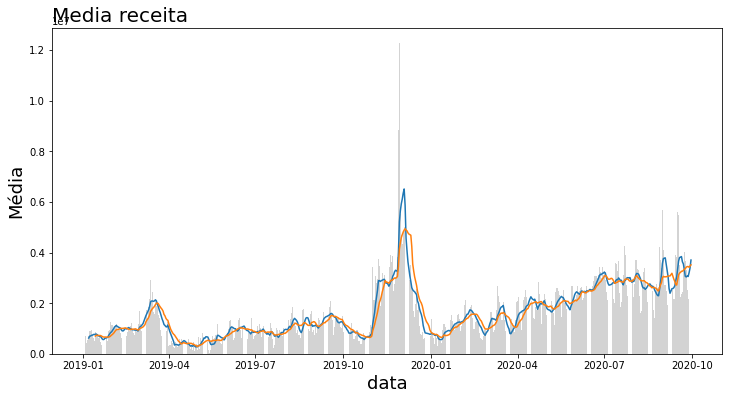

In [20]:
plt.figure(figsize=(20,12))
plot_line(titulo='Media receita', x='data',y='media_receita',xlabel='data', ylabel='Média',data=data,hue=None)
plot_line(titulo='Media receita', x='data',y='media_receita_14',xlabel='data', ylabel='Média',data=data,hue=None)

plt.bar(data['data'],data['receita'], color='lightgrey');

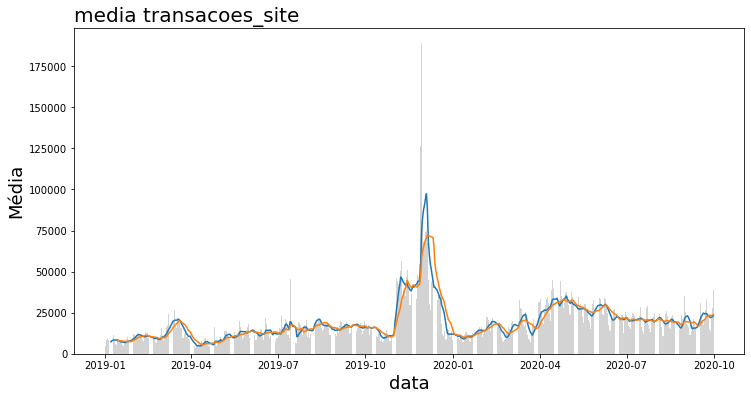

In [21]:
plt.figure(figsize=(20,12))
plot_line(titulo='media transacoes_site', x='data',y='media_transacoes_site',xlabel='data', ylabel='Média',data=data,hue=None)
plot_line(titulo='media transacoes_site', x='data',y='media_transacoes_site_14',xlabel='data', ylabel='Média',data=data,hue=None)

plt.bar(data['data'],data['transacoes_site'], color='lightgrey');

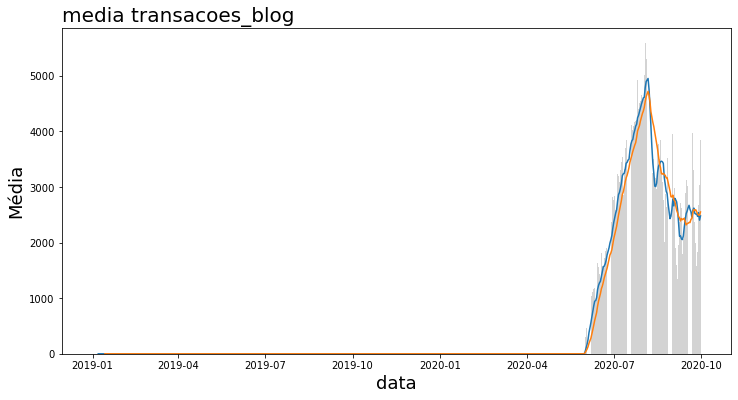

In [22]:
plt.figure(figsize=(20,12))
plot_line(titulo='media transacoes_blog', x='data',y='media_transacoes_blog',xlabel='data', ylabel='Média',data=data,hue=None)
plot_line(titulo='media transacoes_blog', x='data',y='media_transacoes_blog_14',xlabel='data', ylabel='Média',data=data,hue=None)

plt.bar(data['data'],data['transacoes_blog'], color='lightgrey');

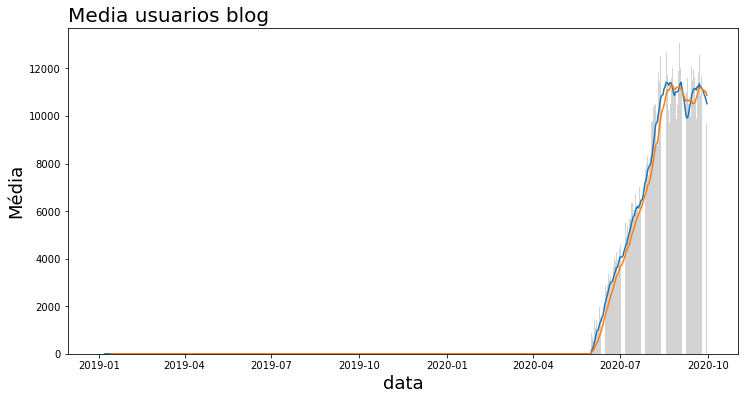

In [23]:
plt.figure(figsize=(20,12))
plot_line(titulo='Media usuarios blog', x='data',y='media_usuarios_blog',xlabel='data', ylabel='Média',data=data,hue=None)
plot_line(titulo='Media usuarios blog', x='data',y='media_usuarios_blog_14',xlabel='data', ylabel='Média',data=data,hue=None)

plt.bar(data['data'],data['usuarios_blog'], color='lightgrey');

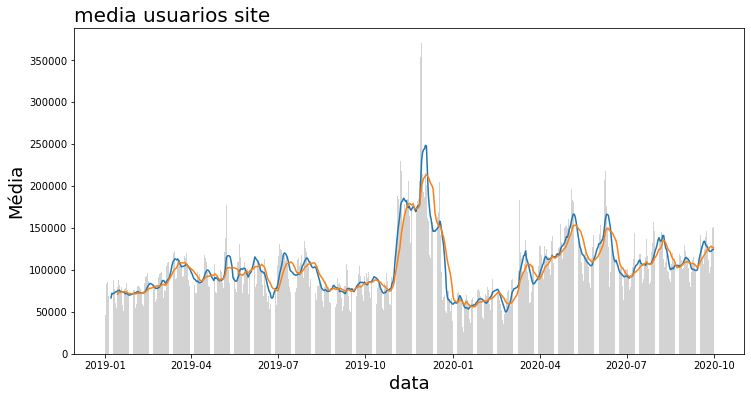

In [24]:

plt.figure(figsize=(20,12))
plot_line(titulo='media usuarios site', x='data',y='media_usuarios_site',xlabel='data', ylabel='Média',data=data,hue=None)
plot_line(titulo='media usuarios site', x='data',y='media_usuarios_site_14',xlabel='data', ylabel='Média',data=data,hue=None)

plt.bar(data['data'],data['usuarios_site'], color='lightgrey');

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   data                        639 non-null    datetime64[ns]
 1   receita                     639 non-null    int64         
 2   transacoes_blog             639 non-null    int64         
 3   transacoes_site             639 non-null    int64         
 4   usuarios_blog               639 non-null    int64         
 5   usuarios_site               639 non-null    int64         
 6   receita_aceleracao          638 non-null    float64       
 7   transacoes_blog_aceleracao  638 non-null    float64       
 8   transacoes_site_aceleracao  638 non-null    float64       
 9   usuarios_blog_aceleracao    638 non-null    float64       
 10  usuarios_site_aceleracao    638 non-null    float64       
 11  media_receita               633 non-null    float64       

In [26]:
data['dia_da_semana'] = data['data'].dt.day_name()
data.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,receita_aceleracao,transacoes_blog_aceleracao,transacoes_site_aceleracao,usuarios_blog_aceleracao,...,media_receita_14,media_transacoes_site,media_transacoes_site_14,media_transacoes_blog,media_transacoes_blog_14,media_usuarios_blog,media_usuarios_blog_14,media_usuarios_site,media_usuarios_site_14,dia_da_semana
0,2019-01-01,349184,0,4693,0,46739,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
1,2019-01-02,867328,0,8501,0,83129,518144.0,0.0,3808.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
2,2019-01-03,758590,0,9375,0,86067,-108738.0,0.0,874.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
3,2019-01-04,688873,0,8405,0,69363,-69717.0,0.0,-970.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
4,2019-01-05,441760,0,6136,0,56183,-247113.0,0.0,-2269.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday


In [27]:
# Dic dos dias da semana
dias_traduzidos = {'Monday' : 'Segunda' , 
                   'Tuesday' : 'Terça' , 
                   'Wednesday' : 'Quarta' , 
                   'Thursday' : 'Quinta' , 
                   'Friday' : 'Sexta' , 
                   'Saturday' : 'Sábado' , 
                   'Sunday' : 'Domingo'
                   }

In [28]:
data['dia_da_semana'] = data['dia_da_semana'].map(dias_traduzidos)

In [29]:
group_receita = data.groupby('dia_da_semana')['receita','receita_aceleracao'].mean().round()
group_transacao = data.groupby('dia_da_semana')['transacoes_site','transacoes_site_aceleracao','transacoes_blog','transacoes_blog_aceleracao'].mean().round()
group_users = data.groupby('dia_da_semana')['usuarios_blog','usuarios_blog_aceleracao','usuarios_site','usuarios_site_aceleracao'].mean().round()


In [30]:
group_receita['dia_da_semana'] = group_receita.index
group_transacao['dia_da_semana'] = group_transacao.index
group_users['dia_da_semana'] = group_users.index

In [31]:
group_receita.head(7)

,receita,receita_aceleracao,dia_da_semana
dia_da_semana,,,
Domingo,1220678.0,-75152.0,Domingo
Quarta,1891459.0,167837.0,Quarta
Quinta,1859781.0,16111.0,Quinta
Segunda,1631217.0,410539.0,Segunda
Sexta,1740616.0,-119166.0,Sexta
Sábado,1295830.0,-444786.0,Sábado
Terça,1723622.0,107508.0,Terça


In [32]:
group_users = group_users.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sábado'])
group_transacao = group_transacao.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sábado'])
group_receita = group_receita.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sábado'])

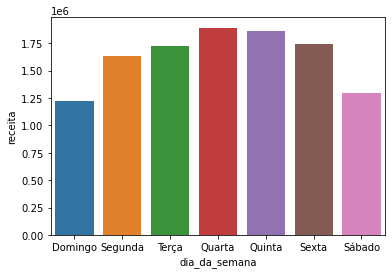

In [33]:
sns.barplot(group_receita.dia_da_semana,group_receita.receita);

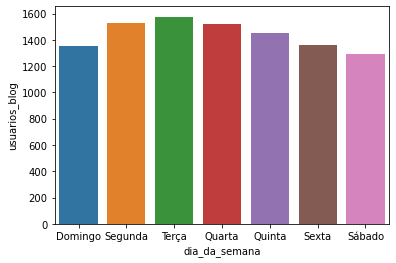

In [34]:
sns.barplot(group_users.dia_da_semana,group_users.usuarios_blog);

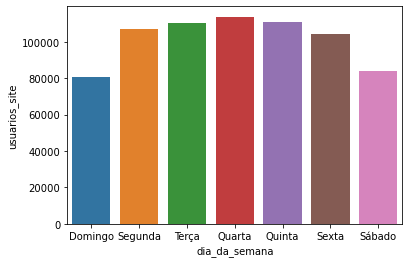

In [35]:
sns.barplot(group_users.dia_da_semana,group_users.usuarios_site);

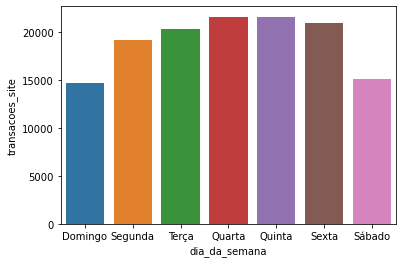

In [36]:
sns.barplot(group_transacao.dia_da_semana,group_transacao.transacoes_site);

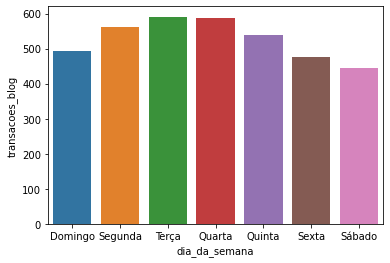

In [37]:
sns.barplot(group_transacao.dia_da_semana,group_transacao.transacoes_blog);

Com um pouco de análises estatisticas vemos que dia da semana com maior **Receita** esta sendo a *quarta* , o dia que tem maior media de  usuarios no **blog** é terça, usuarios no **site** *tem a maior media no dia na quarta, porém nas terças e quintas o acesso é muito alto também*, já na parte de transações vemos que o **site** *tem maior media em dois dias na quarta e na quinta* , já o **blog**  fica com a *terça e quarta*

# Feature extraction
* dividindo as series temporais
* tratando os dados zeros

In [38]:
df_noZeros=data_backup.replace(0,np.nan)

In [39]:
df_noZeros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             639 non-null    object 
 1   receita          639 non-null    int64  
 2   transacoes_blog  122 non-null    float64
 3   transacoes_site  639 non-null    int64  
 4   usuarios_blog    122 non-null    float64
 5   usuarios_site    639 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 30.1+ KB


In [40]:
df_noZeros.transacoes_blog.mean()

2767.344262295082

In [41]:
df_noZeros.transacoes_blog.std()

1169.620696943617

In [42]:
df_noZeros.transacoes_blog.mean() - df_noZeros.transacoes_blog.std()

1597.723565351465

In [43]:
df_noZeros.usuarios_blog.mean()

7541.5

In [44]:
df_noZeros.usuarios_blog.std()

3671.701034053709

In [45]:
df_noZeros.usuarios_blog.mean() - df_noZeros.usuarios_blog.std()

3869.798965946291

In [46]:
df_noZeros.transacoes_blog.fillna(2257.9, inplace=True)
df_noZeros.usuarios_blog.fillna(3869.7, inplace=True)

In [47]:
df_noZeros.data = pd.to_datetime(df_noZeros.data)

In [48]:
df_noZeros

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349184,2257.9,4693,3869.7,46739
1,2019-01-02,867328,2257.9,8501,3869.7,83129
2,2019-01-03,758590,2257.9,9375,3869.7,86067
3,2019-01-04,688873,2257.9,8405,3869.7,69363
4,2019-01-05,441760,2257.9,6136,3869.7,56183
...,...,...,...,...,...,...
634,2020-09-26,2509687,1580.0,15320,9292.0,96178
635,2020-09-27,2182679,1838.0,14135,10052.0,103494
636,2020-09-28,3496475,2684.0,21724,11224.0,127524
637,2020-09-29,4519732,3037.0,28017,11570.0,150116


receita



In [49]:
receita_TS = df_noZeros[['data','receita']]
receita_TS

,data,receita
0,2019-01-01,349184
1,2019-01-02,867328
2,2019-01-03,758590
3,2019-01-04,688873
4,2019-01-05,441760
...,...,...
634,2020-09-26,2509687
635,2020-09-27,2182679
636,2020-09-28,3496475
637,2020-09-29,4519732


transacoes blog

In [50]:
transacoes_blog_TS = df_noZeros[['data','transacoes_blog']]
transacoes_blog_TS

,data,transacoes_blog
0,2019-01-01,2257.9
1,2019-01-02,2257.9
2,2019-01-03,2257.9
3,2019-01-04,2257.9
4,2019-01-05,2257.9
...,...,...
634,2020-09-26,1580.0
635,2020-09-27,1838.0
636,2020-09-28,2684.0
637,2020-09-29,3037.0


usuarios blog

In [51]:
usuarios_blog_TS = df_noZeros[['data','usuarios_blog']]
usuarios_blog_TS

,data,usuarios_blog
0,2019-01-01,3869.7
1,2019-01-02,3869.7
2,2019-01-03,3869.7
3,2019-01-04,3869.7
4,2019-01-05,3869.7
...,...,...
634,2020-09-26,9292.0
635,2020-09-27,10052.0
636,2020-09-28,11224.0
637,2020-09-29,11570.0


transacoes site

In [52]:
transacoes_site_TS = df_noZeros[['data','transacoes_site']]
transacoes_site_TS

,data,transacoes_site
0,2019-01-01,4693
1,2019-01-02,8501
2,2019-01-03,9375
3,2019-01-04,8405
4,2019-01-05,6136
...,...,...
634,2020-09-26,15320
635,2020-09-27,14135
636,2020-09-28,21724
637,2020-09-29,28017


usuarios site

In [53]:
usuarios_site_TS = df_noZeros[['data','usuarios_site']]
usuarios_site_TS

,data,usuarios_site
0,2019-01-01,46739
1,2019-01-02,83129
2,2019-01-03,86067
3,2019-01-04,69363
4,2019-01-05,56183
...,...,...
634,2020-09-26,96178
635,2020-09-27,103494
636,2020-09-28,127524
637,2020-09-29,150116


# Prevendo a receita

In [54]:
receita_TS = receita_TS.set_index('data').sort_index()
receita_TS

,receita
data,
2019-01-01,349184
2019-01-02,867328
2019-01-03,758590
2019-01-04,688873
2019-01-05,441760
...,...
2020-09-26,2509687
2020-09-27,2182679
2020-09-28,3496475


teste de hipoteses da receita

In [55]:
from scipy.stats import normaltest
sig = 0.05

In [56]:
normaltest(receita_TS.receita)

NormaltestResult(statistic=376.4558971365377, pvalue=1.7932489979653222e-82)

H0: temos uma distribuição normal<br/>
H1: distribuição não é normal

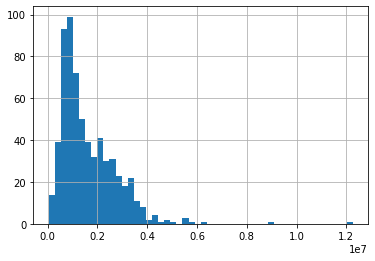

In [57]:
receita_TS.receita.hist(bins=50);

In [58]:
stat_test, p_valor = normaltest(receita_TS.receita)
print(stat_test)
print(p_valor)



376.4558971365377
1.7932489979653222e-82


In [59]:
if p_valor < sig:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

A Hipótese Nula pode ser rejeitada


logo afirmamos que não temos uma distribuição na receita.

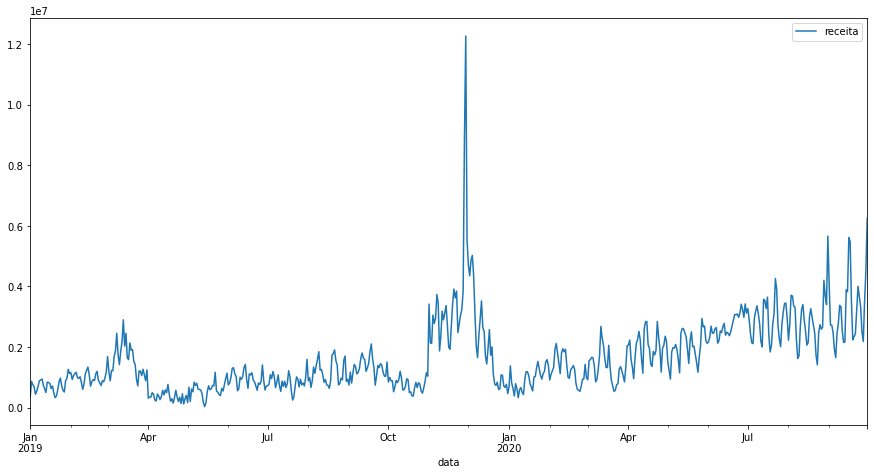

In [60]:
fig, ax = plt.subplots(figsize=(15,7.5))
receita_TS.resample('D').sum().plot(ax=ax)
plt.show()

In [61]:
base_line = receita_TS.shift(1)

In [62]:
base_line

,receita
data,
2019-01-01,NaN
2019-01-02,349184.0
2019-01-03,867328.0
2019-01-04,758590.0
2019-01-05,688873.0
...,...
2020-09-26,3320034.0
2020-09-27,2509687.0
2020-09-28,2182679.0


In [63]:
base_line.replace(np.nan,0, inplace=True)

In [64]:
from sklearn.metrics import mean_squared_error, median_absolute_error

In [65]:
baseline_score_mse = mean_squared_error(receita_TS, base_line)
baseline_score_mae = median_absolute_error(receita_TS, base_line)

print('Test MSE: %.3f' % baseline_score_mse)
print('Test MAE: %.3f' % baseline_score_mae)

Test MSE: 335142787669.380
Test MAE: 234147.000


preprocessamento para o modelo

In [66]:
from prophet import Prophet

In [67]:
prophet_df = receita_TS.resample('D').sum().reset_index().rename(columns = {'data':'ds', 'receita':'y'})

In [68]:
len(prophet_df)*0.7

447.29999999999995

In [69]:
treino = prophet_df[:447]

In [70]:
teste_receita = prophet_df[447:]

#### modelo diario

In [71]:
# instanciando, adicionando os feriados e treinando o modelo
model = Prophet()
model.add_country_holidays(country_name='BR')
model.fit(treino)

#periodo da previsão
future = model.make_future_dataframe(periods = 365)

#realizar a previsão para o período estabelecido
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


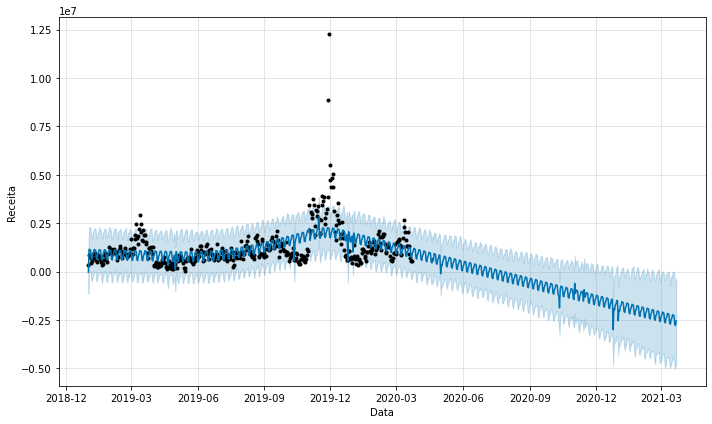

In [72]:
model.plot(forecast, xlabel='Data', ylabel='Receita');

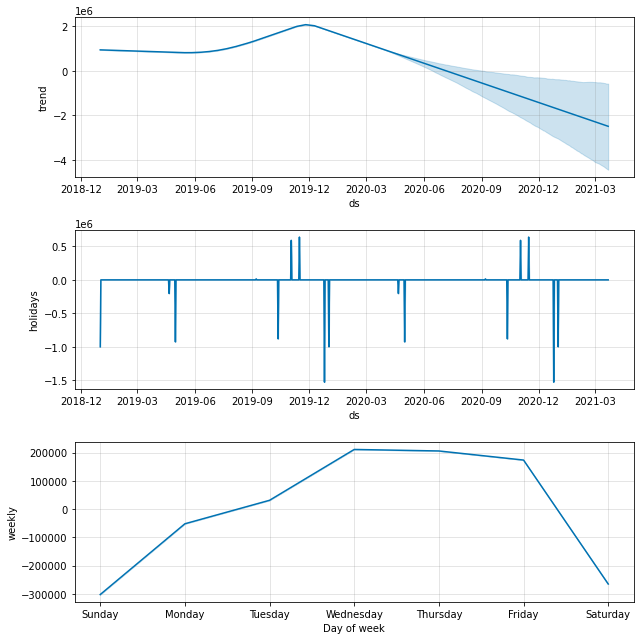

In [73]:
# separar os componentes do modelo
model.plot_components(forecast);

#### modelo semanal

In [74]:
prophet_df2 = receita_TS.resample('W').sum().reset_index().rename(columns = {'data':'ds', 'receita':'y'})
treino2 = prophet_df2[:447]
model2 = Prophet()
model2.add_country_holidays(country_name='BR')
model2.fit(treino2)

#periodo da previsão
future2 = model2.make_future_dataframe(periods = 52)

#realizar a previsão para o período estabelecido
forecast2 = model2.predict(future2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


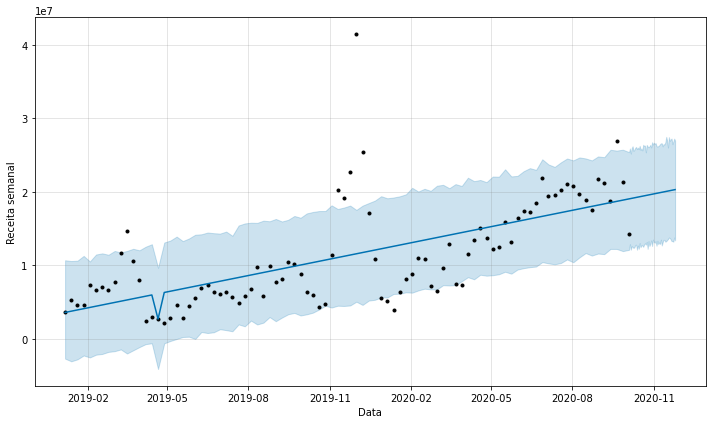

In [75]:
# visualizar o gráfico com as previsões
model2.plot(forecast2, xlabel='Data', ylabel='Receita semanal');

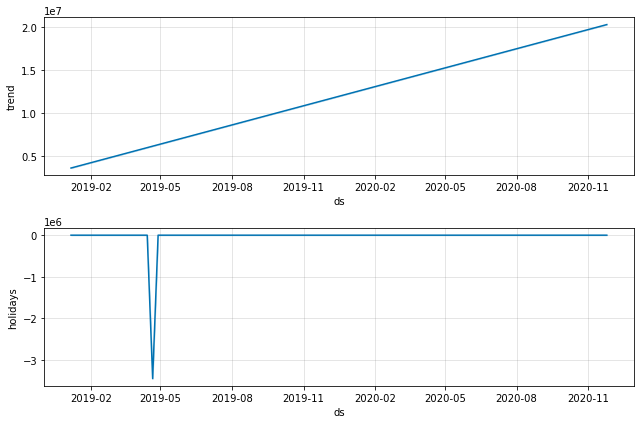

In [76]:
# separar os componentes do modelo
model2.plot_components(forecast2);

### Avaliação do modelo diario

In [77]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '30 days')
df_cv.head()

INFO:prophet:Making 22 forecasts with cutoffs between 2019-04-12 00:00:00 and 2020-02-21 00:00:00


  0%|          | 0/22 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-13,564902.866133,92307.731939,1.033813e+06,420450,2019-04-12
1,2019-04-14,482276.868363,23321.687185,9.597708e+05,585911,2019-04-12
2,2019-04-15,641614.575305,182204.982436,1.136093e+06,493451,2019-04-12
3,2019-04-16,689459.912246,215539.638246,1.161042e+06,764866,2019-04-12
4,2019-04-17,790731.673753,296760.576692,1.262958e+06,439002,2019-04-12


In [78]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,8.150465e+11,9.027993e+05,600921.148031,0.852051,0.352393,0.478580,0.681818
1,4 days,8.328557e+11,9.126093e+05,632484.022704,0.788429,0.369946,0.493505,0.681818
2,5 days,1.498110e+12,1.223973e+06,740668.116543,0.676180,0.420328,0.521004,0.666667
3,6 days,3.061828e+12,1.749808e+06,894436.471969,0.697424,0.420328,0.552882,0.666667
4,7 days,3.254323e+12,1.803974e+06,941452.322089,0.714643,0.465481,0.600131,0.651515


In [79]:
df_p.mse.mean()

2138813135546.1262

In [80]:
df_p.mape.mean()

0.9222629001708447

In [81]:
from prophet.plot import plot_cross_validation_metric

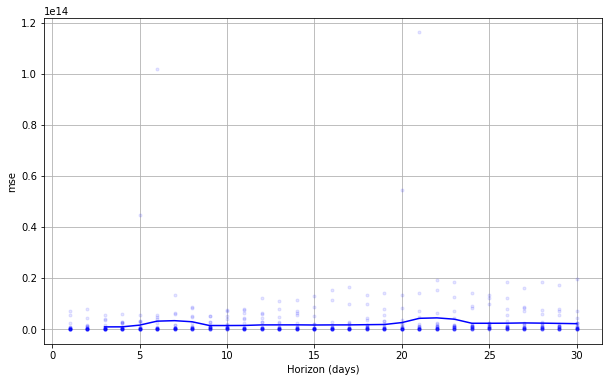

In [82]:
fig = plot_cross_validation_metric(df_cv, metric='mse')

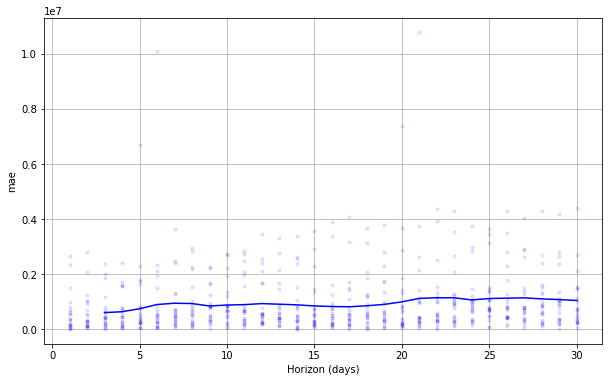

In [83]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

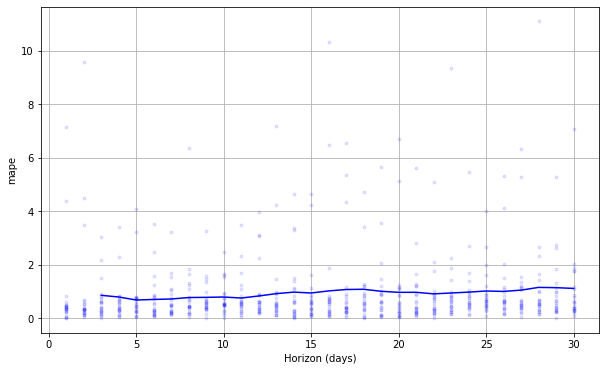

In [84]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

# Prevendo a transações

## preprocessamento

In [85]:
transacoes_blog_TS = transacoes_blog_TS.set_index('data').sort_index()
transacoes_blog_TS

,transacoes_blog
data,
2019-01-01,2257.9
2019-01-02,2257.9
2019-01-03,2257.9
2019-01-04,2257.9
2019-01-05,2257.9
...,...
2020-09-26,1580.0
2020-09-27,1838.0
2020-09-28,2684.0


In [86]:
from scipy.stats import normaltest
sig = 0.05

In [87]:
normaltest(transacoes_blog_TS.transacoes_blog)

NormaltestResult(statistic=330.8171058250195, pvalue=1.458741070205937e-72)

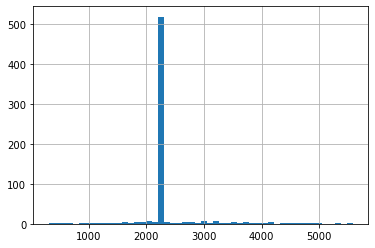

In [88]:
transacoes_blog_TS.transacoes_blog.hist(bins=50);

In [89]:
stat_test, p_valor = normaltest(transacoes_blog_TS.transacoes_blog)
print(stat_test)
print(p_valor)


330.8171058250195
1.458741070205937e-72


In [90]:
if p_valor < sig:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

A Hipótese Nula pode ser rejeitada


In [91]:
transacoes_site_TS = transacoes_site_TS.set_index('data').sort_index()

673.8096197338224
4.8317020805360967e-147
A Hipótese Nula pode ser rejeitada


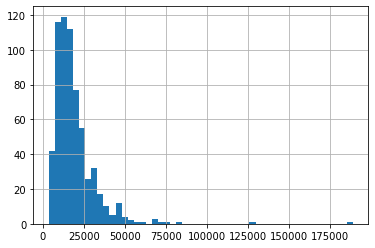

In [92]:

stat_test, p_valor = normaltest(transacoes_site_TS.transacoes_site)
print(stat_test)
print(p_valor)


if p_valor < sig:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

transacoes_site_TS.transacoes_site.hist(bins=50);

## transações blog

In [93]:
prophet_df = transacoes_blog_TS.resample('D').sum().reset_index().rename(columns = {'data':'ds', 'transacoes_blog':'y'})

In [94]:
len(prophet_df)*0.7

447.29999999999995

In [95]:
treino_t_blog= prophet_df[:447]

In [96]:
teste_t_blog = prophet_df[447:]

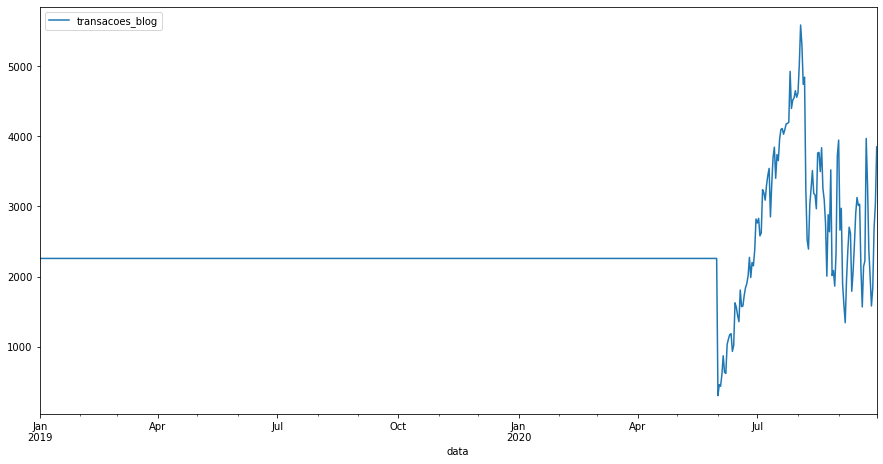

In [97]:
fig, ax = plt.subplots(figsize=(15,7.5))
transacoes_blog_TS.resample('D').sum().plot(ax=ax)
plt.show()

In [98]:
base_line_transacao_blog = transacoes_blog_TS.shift(1)
base_line_transacao_blog.replace(np.nan,0, inplace=True)

In [99]:
base_line_transacao_blog_score_mse = mean_squared_error(receita_TS, base_line_transacao_blog)
base_line_transacao_blog_score_mae = median_absolute_error(receita_TS, base_line_transacao_blog)

print('Test MSE: %.3f' % base_line_transacao_blog_score_mse)
print('Test MAE: %.3f' % base_line_transacao_blog_score_mae)

Test MSE: 3973909379591.128
Test MAE: 1260903.100


### modelo diario

In [100]:
# instanciando, adicionando os feriados e treinando o modelo
model_t_blog = Prophet()
model_t_blog.add_country_holidays(country_name='BR')
model_t_blog.fit(treino_t_blog)

#periodo da previsão
future_tran = model_t_blog.make_future_dataframe(periods = 365)

#realizar a previsão para o período estabelecido
forecast_tran = model_t_blog.predict(future_tran)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


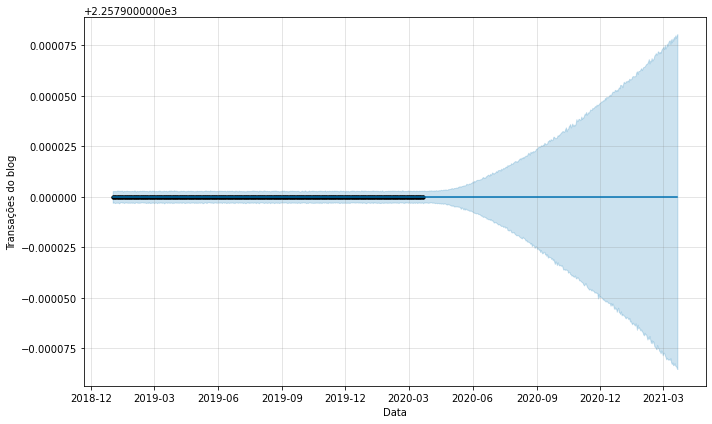

In [101]:
model_t_blog.plot(forecast_tran, xlabel='Data', ylabel='Transações do blog');

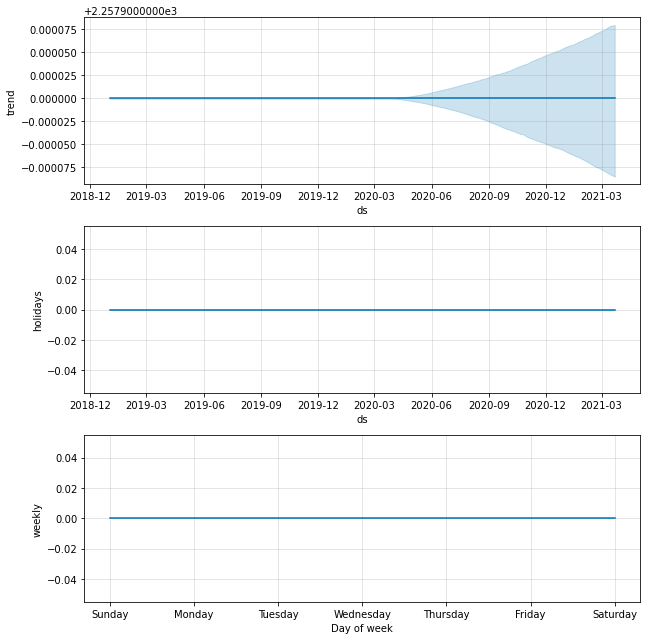

In [102]:
# separar os componentes do modelo
model_t_blog.plot_components(forecast_tran);

In [103]:
df_cv_tran = cross_validation(model_t_blog, horizon = '30 days')
df_cv_tran.head()

INFO:prophet:Making 22 forecasts with cutoffs between 2019-04-12 00:00:00 and 2020-02-21 00:00:00


  0%|          | 0/22 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-13,2257.9,2257.899997,2257.900003,2257.9,2019-04-12
1,2019-04-14,2257.9,2257.899997,2257.900003,2257.9,2019-04-12
2,2019-04-15,2257.9,2257.899997,2257.900003,2257.9,2019-04-12
3,2019-04-16,2257.9,2257.899997,2257.900003,2257.9,2019-04-12
4,2019-04-17,2257.9,2257.899997,2257.900003,2257.9,2019-04-12


In [104]:
df_p_t = performance_metrics(df_cv_tran)
df_p_t.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4 days,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5 days,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6 days,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,7 days,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [105]:
df_p_t.mse.mean()

0.0

In [106]:
df_p_t.mae.mean()

0.0

In [107]:
df_p_t.mape.mean()

0.0

## transações site

In [108]:
prophet_df = transacoes_site_TS.resample('D').sum().reset_index().rename(columns = {'data':'ds', 'transacoes_site':'y'})

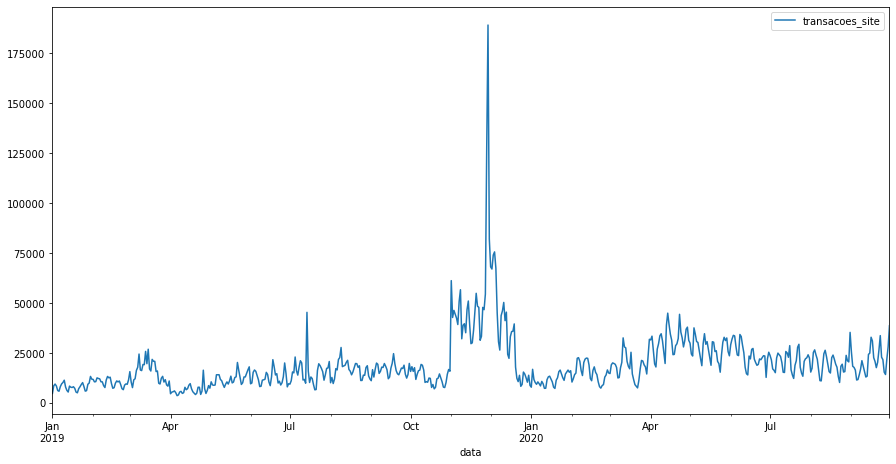

In [109]:
len(prophet_df)*0.7
treino_t = prophet_df[:447]
teste_t = prophet_df[447:]
fig, ax = plt.subplots(figsize=(15,7.5))
transacoes_site_TS.resample('D').sum().plot(ax=ax)
plt.show()

In [110]:
base_line_transacao_site = transacoes_site_TS.shift(1)
base_line_transacao_site.replace(np.nan,0, inplace=True)

In [111]:
base_line_transacao_site_score_mse = mean_squared_error(receita_TS, base_line_transacao_site)
base_line_transacao_site_score_mae = median_absolute_error(receita_TS, base_line_transacao_site)

print('Test MSE: %.3f' % base_line_transacao_site_score_mse)
print('Test MAE: %.3f' % base_line_transacao_site_score_mae)

Test MSE: 3899108261364.233
Test MAE: 1253295.000


### modelo diario

In [112]:
treino_t

,ds,y
0,2019-01-01,4693
1,2019-01-02,8501
2,2019-01-03,9375
3,2019-01-04,8405
4,2019-01-05,6136
...,...,...
442,2020-03-18,14454
443,2020-03-19,11627
444,2020-03-20,9087
445,2020-03-21,8283


In [113]:
# instanciando, adicionando os feriados e treinando o modelo
model_t_site = Prophet()
model_t_site.add_country_holidays(country_name='BR')
model_t_site.fit(treino_t)

#periodo da previsão
future_tran =model_t_site.make_future_dataframe(periods = 365)

#realizar a previsão para o período estabelecido
forecast_tran = model_t_site.predict(future_tran)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


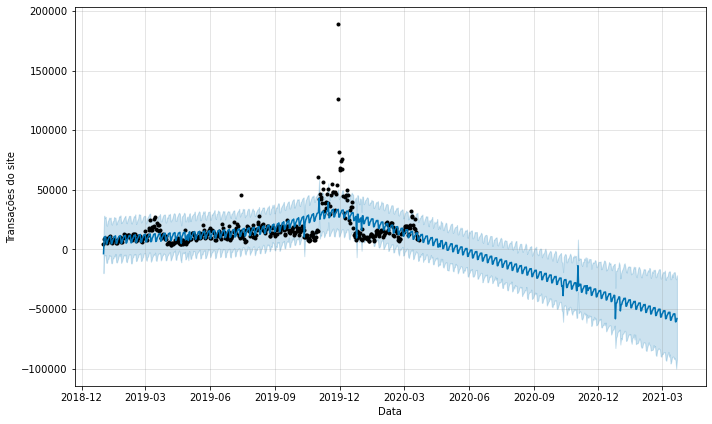

In [114]:
model_t_site.plot(forecast_tran, xlabel='Data', ylabel='Transações do site');

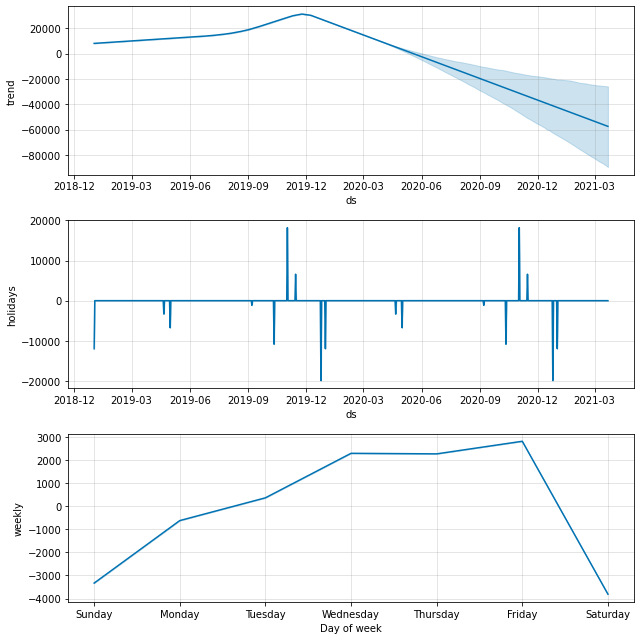

In [115]:
# separar os componentes do modelo
model_t_site.plot_components(forecast_tran);

In [116]:
df_cv_tran = cross_validation(model_t_site, horizon = '30 days')
df_cv_tran.head()

INFO:prophet:Making 22 forecasts with cutoffs between 2019-04-12 00:00:00 and 2020-02-21 00:00:00


  0%|          | 0/22 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-13,8243.122260,3069.090129,13482.577065,6527,2019-04-12
1,2019-04-14,7854.080641,2654.185420,12946.003833,7080,2019-04-12
2,2019-04-15,10034.225500,4764.398029,15002.400493,8799,2019-04-12
3,2019-04-16,10448.688124,4833.195942,16040.322993,9573,2019-04-12
4,2019-04-17,11085.043857,6250.910292,16528.147520,7035,2019-04-12


In [117]:
df_p_t = performance_metrics(df_cv_tran)
df_p_t.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.823949e+08,13505.367247,8081.054727,0.584653,0.229440,0.370780,0.742424
1,4 days,1.847006e+08,13590.458691,8365.252901,0.559660,0.247393,0.372069,0.712121
2,5 days,3.060716e+08,17494.903292,9757.665861,0.572536,0.317001,0.398954,0.681818
3,6 days,6.683011e+08,25851.520489,11962.860743,0.602961,0.332173,0.420436,0.696970
4,7 days,7.175985e+08,26788.029434,13024.290754,0.627085,0.372047,0.463129,0.696970


In [118]:
df_p_t.mae.mean()

12948.665582565034

In [119]:
df_p_t.mse.mean()

480552834.15877634

# Users

## blog

### preprocessamento

In [120]:
usuarios_blog_TS = usuarios_blog_TS.set_index('data').sort_index()
usuarios_blog_TS

,usuarios_blog
data,
2019-01-01,3869.7
2019-01-02,3869.7
2019-01-03,3869.7
2019-01-04,3869.7
2019-01-05,3869.7
...,...
2020-09-26,9292.0
2020-09-27,10052.0
2020-09-28,11224.0


323.65323700619695
5.2431533384350145e-71
A Hipótese Nula pode ser rejeitada


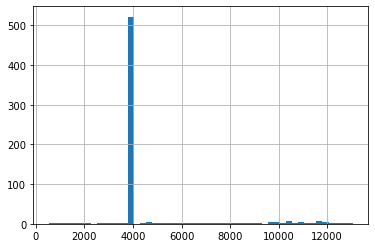

In [121]:
sig = 0.05
normaltest(usuarios_blog_TS.usuarios_blog)
stat_test, p_valor = normaltest(usuarios_blog_TS.usuarios_blog)
print(stat_test)
print(p_valor)
if p_valor < sig:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")
usuarios_blog_TS.usuarios_blog.hist(bins=50);

In [122]:
prophet_df = usuarios_blog_TS.resample('D').sum().reset_index().rename(columns = {'data':'ds', 'usuarios_blog':'y'})

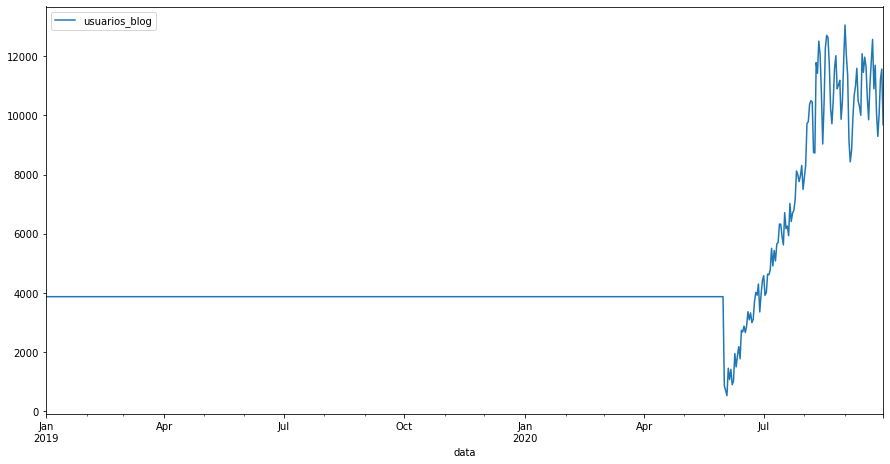

In [123]:
len(prophet_df)*0.7
treino_user_blog= prophet_df[:447]
teste_user_blog = prophet_df[447:]
fig, ax = plt.subplots(figsize=(15,7.5))
usuarios_blog_TS.resample('D').sum().plot(ax=ax)
plt.show()

In [124]:
base_line_usuarios_blog= usuarios_blog_TS.shift(1)
base_line_usuarios_blog.replace(np.nan,0, inplace=True)

base_line_usuarios_blog_score_mse = mean_squared_error(usuarios_blog_TS, base_line_usuarios_blog)
base_line_usuarios_blog_score_mae = median_absolute_error(usuarios_blog_TS, base_line_usuarios_blog)

print('Test MSE: %.3f' % base_line_usuarios_blog_score_mse)
print('Test MAE: %.3f' % base_line_usuarios_blog_score_mae)

Test MSE: 172620.414
Test MAE: 0.000


### Modelagem

In [125]:
# instanciando, adicionando os feriados e treinando o modelo
model_user_blog = Prophet()
model_user_blog.add_country_holidays(country_name='BR')
model_user_blog.fit(treino_user_blog)

#periodo da previsão
future_tran = model_user_blog.make_future_dataframe(periods = 365)

#realizar a previsão para o período estabelecido
forecast_tran = model_user_blog.predict(future_tran)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


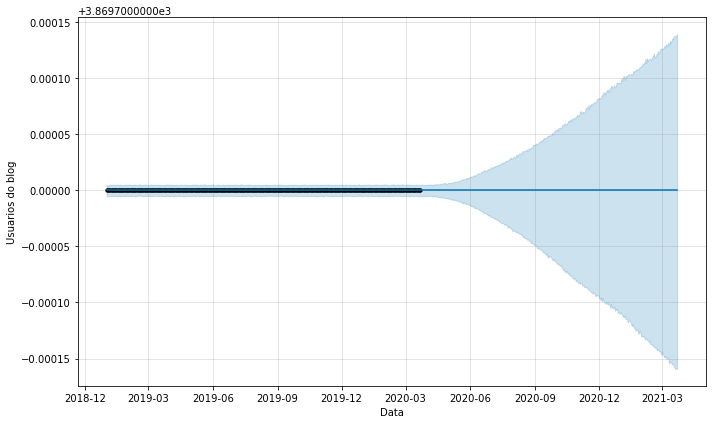

In [126]:
model_user_blog.plot(forecast_tran, xlabel='Data', ylabel='Usuarios do blog');

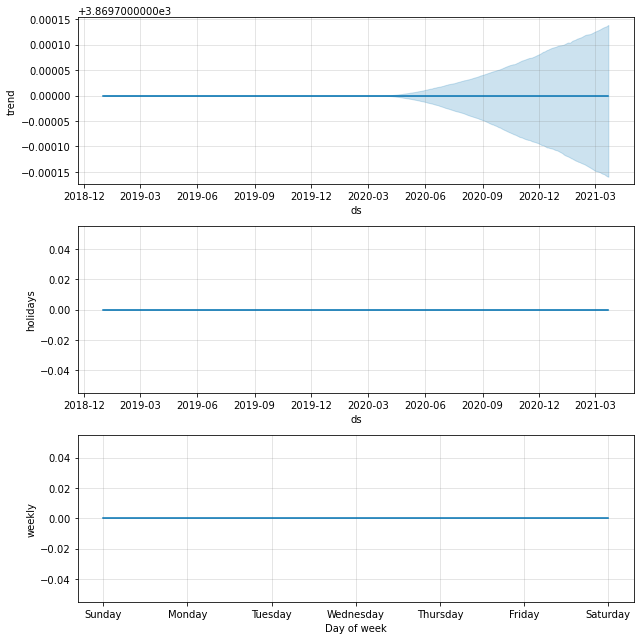

In [127]:
# separar os componentes do modelo
model_user_blog.plot_components(forecast_tran);

### semanal

In [128]:
prophet_df2 = usuarios_blog_TS.resample('W').sum().reset_index().rename(columns = {'data':'ds', 'usuarios_blog':'y'})
treino_user2 = prophet_df2[:447]
model_user2 = Prophet()
model_user2.add_country_holidays(country_name='BR')
model_user2.fit(treino_user2)

#periodo da previsão
future2 = model_user2.make_future_dataframe(periods = 52)

#realizar a previsão para o período estabelecido
forecast2 = model_user2.predict(future2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


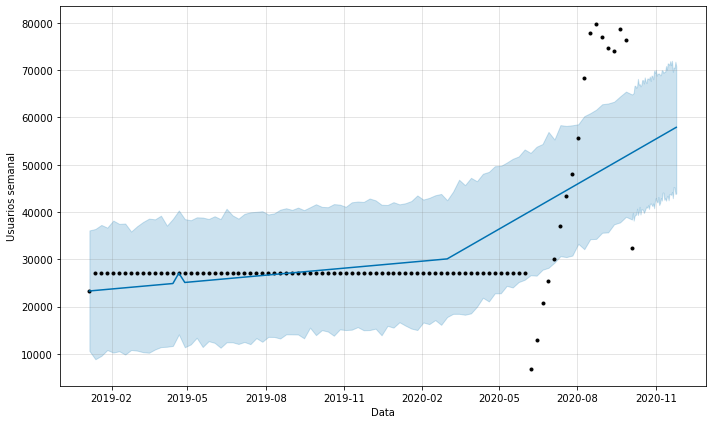

In [129]:
# visualizar o gráfico com as previsões
model_user2.plot(forecast2, xlabel='Data', ylabel='Usuarios semanal');

## Usuarios site

### preprocessamento

In [130]:
usuarios_site_TS = usuarios_site_TS.set_index('data').sort_index()
usuarios_site_TS

,usuarios_site
data,
2019-01-01,46739
2019-01-02,83129
2019-01-03,86067
2019-01-04,69363
2019-01-05,56183
...,...
2020-09-26,96178
2020-09-27,103494
2020-09-28,127524


269.9584555228764
2.3947832487712726e-59
A Hipótese Nula pode ser rejeitada


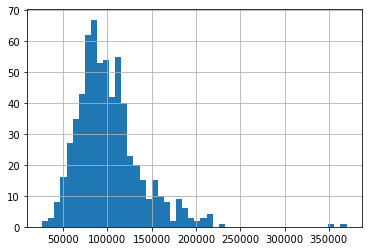

In [131]:
sig = 0.05
normaltest(usuarios_site_TS.usuarios_site)
stat_test, p_valor = normaltest(usuarios_site_TS.usuarios_site)
print(stat_test)
print(p_valor)
if p_valor < sig:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")
usuarios_site_TS.usuarios_site.hist(bins=50);

In [132]:
prophet_df = usuarios_site_TS.resample('D').sum().reset_index().rename(columns = {'data':'ds', 'usuarios_site':'y'})

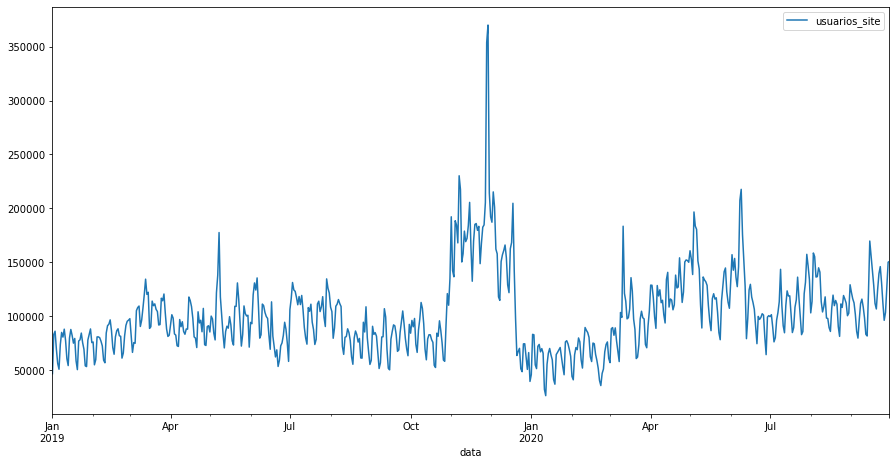

In [133]:
len(prophet_df)*0.7
treino_user_site= prophet_df[:447]
teste_user_site = prophet_df[447:]
fig, ax = plt.subplots(figsize=(15,7.5))
usuarios_site_TS.resample('D').sum().plot(ax=ax)
plt.show()

### Modelagem

In [134]:
# instanciando, adicionando os feriados e treinando o modelo
model_user_site = Prophet()
model_user_site.add_country_holidays(country_name='BR')
model_user_site.fit(treino_user_site)

#periodo da previsão
future_tran = model_user_site.make_future_dataframe(periods = 365)

#realizar a previsão para o período estabelecido
forecast_tran = model_user_site.predict(future_tran)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


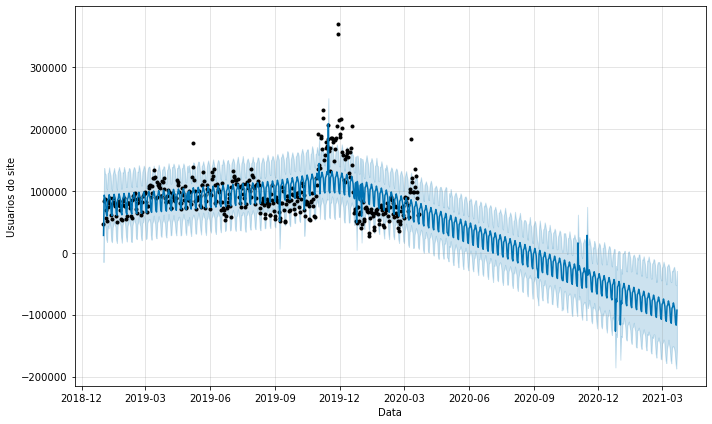

In [135]:
model_user_site.plot(forecast_tran, xlabel='Data', ylabel='Usuarios do site');

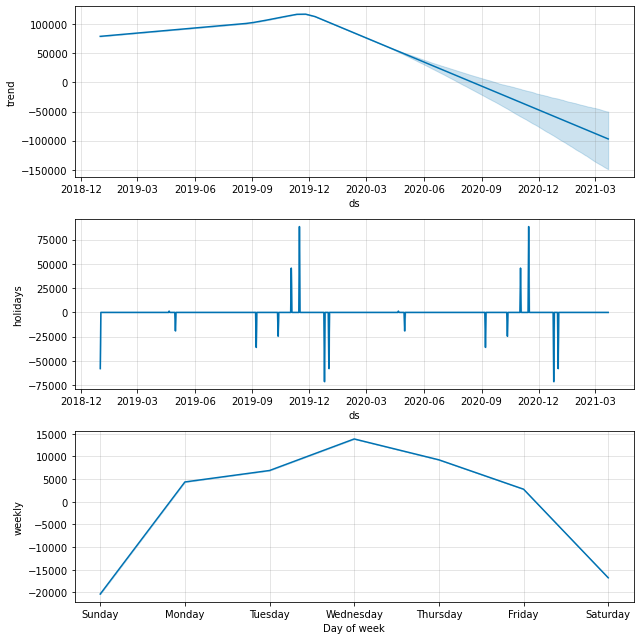

In [136]:
# separar os componentes do modelo
model_user_site.plot_components(forecast_tran);

In [137]:
df_cv_tran = cross_validation(model_user_site, horizon = '30 days')
df_cv_tran.head()

INFO:prophet:Making 22 forecasts with cutoffs between 2019-04-12 00:00:00 and 2020-02-21 00:00:00


  0%|          | 0/22 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-04-13,77101.155513,64968.672112,88554.482660,88173,2019-04-12
1,2019-04-14,74636.992163,62646.786000,86839.327270,87968,2019-04-12
2,2019-04-15,94416.576330,83008.979734,106789.908869,117790,2019-04-12
3,2019-04-16,97771.461489,86409.976002,109882.654213,114544,2019-04-12
4,2019-04-17,102209.324201,89617.268322,114571.377010,108914,2019-04-12


In [138]:
df_p_t = performance_metrics(df_cv_tran)
df_p_t.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.720560e+09,41479.628866,27381.747206,0.347661,0.148128,0.266561,0.621212
1,4 days,1.626864e+09,40334.403677,27247.292492,0.359476,0.160560,0.268702,0.606061
2,5 days,2.036314e+09,45125.540186,29346.347537,0.376687,0.206154,0.275605,0.590909
3,6 days,2.752584e+09,52465.074544,32677.933671,0.403706,0.238711,0.295157,0.575758
4,7 days,3.031676e+09,55060.661386,35416.322510,0.398988,0.252646,0.311871,0.560606


In [139]:
print("MAE : {}".format(df_p_t.mae.mean()))
print("MSE : {}".format(df_p_t.mse.mean()))

MAE : 40709.043703078474
MSE : 3691906297.3332086


# Conclusão

Aplicando técnicas de modelagem podemos ver quais algoritmos podemos usar para um possivel tomada de descisão, vemos que a receita está com uma tendencia decrescente, as questões do blog apesar da grande quantidade de zeros podemos ver segue com tedencia crescente  em conjunto com as transações do blog, e do site.